 ### Telecom Churn Case Study

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
telecom = pd.read_csv("telecom_churn_data.csv", encoding = "ISO-8859-1", low_memory=False)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [13]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [14]:
telecom.shape

(99999, 226)

In [15]:
#Percentage of missing values 

missing = round(100*(telecom.isnull().sum()/len(telecom.index)),2)
missing

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [16]:
# The columns which has missing values

missing[missing!=0]

loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
                        ...  
night_pck_user_9        74.08
fb_user_6               74.85
fb_user_7               74.43
fb_user_8               73.66
fb_user_9               74.08
Length: 166, dtype: float64

### Data Preparation

In [17]:
# Columns with more than 10% missing values
missing[missing>=10]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

#### Impute zeros in the missing values

In [18]:
# Columns which have meaningful missing values are to be imputed by zero
zero_impute_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

# impute missing values with 0
telecom[zero_impute_cols] = telecom[zero_impute_cols].apply(lambda x: x.fillna(0))

In [19]:
telecom_df = telecom.copy()

In [20]:
# All the columns that are related to recharge
rech_cols =  telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data')]
print(rech_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


#### Derive new recharge features

In [21]:
# Derive 'total recharge data amt' from total recharge data and average recharge amt data
telecom_df['total_rech_data_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_rech_data_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']
telecom_df['total_rech_data_amt_8'] = telecom_df['total_rech_data_8'] * telecom_df['av_rech_amt_data_8']

In [22]:
telecom_df['total_rech_amt_6'].describe()

count    99999.000000
mean       327.514615
std        398.019701
min          0.000000
25%        109.000000
50%        230.000000
75%        437.500000
max      35190.000000
Name: total_rech_amt_6, dtype: float64

#### Filter high-value customers

In [23]:
# Total recharge in good phase is the sum of total recharge amt and total recharge data amt for months 6 & 7
telecom_df['total_rech_good_phase'] = (telecom_df['total_rech_data_amt_6'] + telecom_df['total_rech_data_amt_7'] 
                                        + telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7']) / 2

telecom_df['total_rech_good_phase'].describe(percentiles = [.5, .10, .60, .70, .80, .90])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
10%         60.000000
50%        275.000000
60%        360.000000
70%        478.000000
80%        656.500000
90%       1028.000000
max      61236.000000
Name: total_rech_good_phase, dtype: float64

In [25]:
telecom_df['total_rech_action_phase'] = telecom_df['total_rech_data_amt_8'] + telecom_df['total_rech_amt_8']
telecom_df['total_rech_action_phase'].describe(percentiles = [.5, .10, .60, .70, .80, .90])

count    99999.000000
mean       498.858349
std       1106.295653
min          0.000000
10%          0.000000
50%        261.000000
60%        354.000000
70%        484.000000
80%        674.000000
90%       1070.000000
max      95884.500000
Name: total_rech_action_phase, dtype: float64

In [26]:
# Drop the columns which are used to derive total_rech_good_phase and total_rech_rech_action_phase
telecom_df = telecom_df.drop(['total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_amt_6', 'total_rech_amt_7','total_rech_data_amt_8', 'total_rech_amt_8'],
                                      axis = 1)
telecom_df.shape

(99999, 225)

In [27]:
# Find high-value customers by filtering the 70th percentile of the average recharge amount in the first two months
high_value_cust = telecom_df.loc[telecom_df['total_rech_good_phase'] >= telecom_df['total_rech_good_phase'].quantile(0.7), :]
high_value_cust = high_value_cust.reset_index(drop=True)
high_value_cust.shape

(30001, 225)

In [29]:
high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_good_phase,total_rech_action_phase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,559.0,504.0
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,1185.0,3638.0
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,696.0,327.0
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,640.0,718.0
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,583.0,979.0


In [30]:
# Remove the total_rech_data and av_rech_amt_data columns
high_value_cust = high_value_cust.drop(['total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7'],
                                      axis = 1)
high_value_cust.shape

(30001, 221)

In [31]:
high_value_cust = high_value_cust.drop(['total_rech_data_8', 'av_rech_amt_data_8'],axis = 1)
high_value_cust.shape

(30001, 219)

#### Tag churners and remove attributes of the churn phase

In [32]:
# Attributes used to tag churners
high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [33]:
# Deriving a new variable Total Usage from incoming calls, outgoing calls, 2g data and 3g data usage
high_value_cust['total_usage'] = high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)
high_value_cust['total_usage'].describe()

count    30001.000000
mean      1206.720473
std       1260.325394
min          0.000000
25%        418.650000
50%        935.350000
75%       1615.400000
max      39227.890000
Name: total_usage, dtype: float64

In [34]:
# Assigning churn=1 for customers with Total Usage 0 else churn=0
high_value_cust['churn'] = np.where(high_value_cust['total_usage']==0, 1,0)
high_value_cust['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [35]:
# Percentage of churn and non-churn customers
high_value_cust['churn'].value_counts() / len(high_value_cust.index)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

#### Remove all the attributes corresponding to the churn phase 

In [36]:
# Dropping columns belonging to the September month
cols_9 = [col for col in high_value_cust.columns if '_9' in col]
print(cols_9)

high_value_cust.drop(cols_9, axis=1, inplace=True)

high_value_cust.shape

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


(30001, 167)

In [37]:
high_value_cust.drop(['total_usage', 'sep_vbc_3g'], axis=1, inplace=True)
high_value_cust.shape

(30001, 165)

#### Delete columns with over 40% missing values

In [38]:
# The columns with over 40% missing values won't add much to the analysis
missing = round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)),2)
missing[missing>=40]

date_of_last_rech_data_6    44.15
date_of_last_rech_data_7    43.15
date_of_last_rech_data_8    46.83
count_rech_2g_6             44.15
count_rech_2g_7             43.15
count_rech_2g_8             46.83
count_rech_3g_6             44.15
count_rech_3g_7             43.15
count_rech_3g_8             46.83
arpu_3g_6                   44.15
arpu_3g_7                   43.15
arpu_3g_8                   46.83
arpu_2g_6                   44.15
arpu_2g_7                   43.15
arpu_2g_8                   46.83
night_pck_user_6            44.15
night_pck_user_7            43.15
night_pck_user_8            46.83
fb_user_6                   44.15
fb_user_7                   43.15
fb_user_8                   46.83
dtype: float64

In [39]:
# Dropping columns with more than 40% missing values
del_cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','count_rech_2g_6', 
            'count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','fb_user_6','fb_user_7','fb_user_8',
            'night_pck_user_6','night_pck_user_7','night_pck_user_8']

high_value_cust = high_value_cust.drop(del_cols, axis=1)
high_value_cust.shape

(30001, 144)

#### Handling other missing values

In [40]:
# Dropping columns with only one unique value
print("Columns with only one unique value & are dropped:")
for i in high_value_cust.columns:
    if high_value_cust[i].nunique() == 1:
        print(i)
        high_value_cust = high_value_cust.drop(i, axis=1)

Columns with only one unique value & are dropped:
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [41]:
high_value_cust.shape

(30001, 131)

In [43]:
# Check all columns with missing values
missing = round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)),2)
missing[missing!=0]

onnet_mou_6            1.82
onnet_mou_7            1.79
onnet_mou_8            3.91
offnet_mou_6           1.82
offnet_mou_7           1.79
                       ... 
ic_others_7            1.79
ic_others_8            3.91
date_of_last_rech_6    0.24
date_of_last_rech_7    0.33
date_of_last_rech_8    1.94
Length: 84, dtype: float64

In [44]:
# Imputing date_of_last_rech missing values with mode
high_value_cust['date_of_last_rech_6'] = high_value_cust['date_of_last_rech_6'].fillna(high_value_cust['date_of_last_rech_6'].mode()[0])
high_value_cust['date_of_last_rech_7'] = high_value_cust['date_of_last_rech_7'].fillna(high_value_cust['date_of_last_rech_7'].mode()[0])
high_value_cust['date_of_last_rech_8'] = high_value_cust['date_of_last_rech_8'].fillna(high_value_cust['date_of_last_rech_8'].mode()[0])

In [45]:
# Converting date_of_last_rech to day_of_last_rech
high_value_cust['day_of_last_rech_6'] = pd.to_datetime(high_value_cust['date_of_last_rech_6']).dt.day
high_value_cust['day_of_last_rech_7'] = pd.to_datetime(high_value_cust['date_of_last_rech_7']).dt.day
high_value_cust['day_of_last_rech_8'] = pd.to_datetime(high_value_cust['date_of_last_rech_8']).dt.day

In [46]:
# Drop the date_of_last_rech columns
high_value_cust = high_value_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
high_value_cust.shape

(30001, 131)

In [47]:
# Imputing numeric missing values with median
missing_cols = high_value_cust.columns[high_value_cust.isnull().sum()>0]
for col in missing_cols:
    high_value_cust[col].fillna((high_value_cust[col].median()), inplace=True)

In [48]:
# There are no more missing values
missing = round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)),2)
missing[missing!=0]

Series([], dtype: float64)

In [49]:
high_value_cust = high_value_cust.drop(['mobile_number'],axis=1)
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_good_phase,total_rech_action_phase,churn,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
0,197.385,214.816,213.803,88.06,86.885,0.00,229.635,227.12,0.00,0.00,...,968,30.40,0.00,101.20,559.0,504.0,1,21,16,8
1,1069.180,1349.850,3171.480,57.84,54.680,52.29,453.430,567.16,325.91,16.23,...,802,57.74,19.38,18.74,1185.0,3638.0,1,27,25,26
2,378.721,492.223,137.362,413.69,351.030,35.08,94.660,80.63,136.48,0.00,...,315,21.03,910.65,122.16,696.0,327.0,0,25,31,30
3,514.453,597.753,637.760,102.41,132.110,85.14,757.930,896.68,983.39,0.00,...,720,0.00,0.00,0.00,640.0,718.0,0,30,31,31
4,74.350,193.897,366.966,48.96,50.660,33.58,85.410,89.36,205.89,0.00,...,604,40.45,51.86,0.00,583.0,979.0,0,18,7,24


In [50]:
high_value_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_rech_good_phase', 'total_rech_action_phase', 'churn',
       'day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8'],
      dtype='object', length=130)

#### Derive good phase avg variables from variables from months 6 and 7

In [51]:
# Derive GPavg variables
col_list = high_value_cust.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = col+"_GPavg"
    col_6 = col+"_6"
    col_7 = col+"_7"
    high_value_cust[avg_col_name] = (high_value_cust[col_6]  + high_value_cust[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
loc_ic_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
max_rech_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
day_of_last_rech


In [52]:
# Drop variables from months 6 and 7
col_list_to_drop = high_value_cust.filter(regex='_6|_7')
high_value_cust.drop(col_list_to_drop,axis=1,inplace=True)
print (high_value_cust.shape)

(30001, 89)


In [53]:
list(high_value_cust.columns)

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'max_rech_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'total_rech_good_phase',
 'total_rech_action_phase',
 'churn',
 'day_of_last_rech_8',
 'arpu_GPavg',
 'onnet_mou_GPavg',
 'offnet_mou_GPavg',
 'roam_ic_mou_GPavg',
 'roam_og_mou_GPavg',
 'loc_og_t2t_mou_GPa

### EDA

##### total_rech vs churn

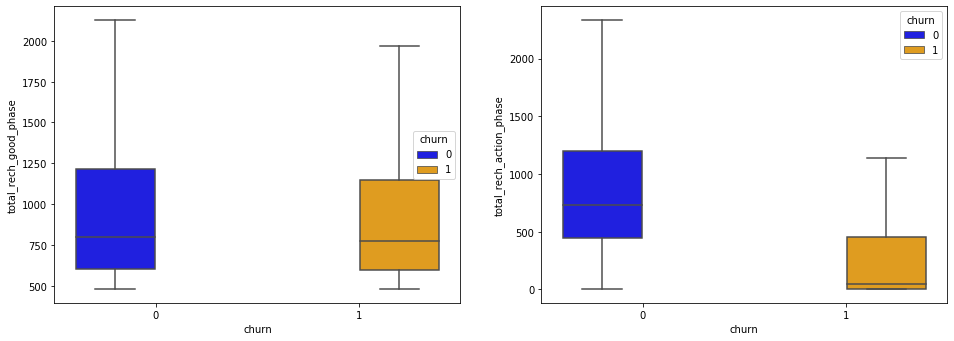

In [63]:
plt.figure(figsize=(16,12))
df = high_value_cust
plt.subplot(2,2,1)
sns.boxplot(data=df, y="total_rech_good_phase",x="churn",hue="churn",
                showfliers=False,palette=["blue","orange"])
plt.subplot(2,2,2)
sns.boxplot(data=df, y="total_rech_action_phase",x="churn",hue="churn",
                showfliers=False,palette=["blue","orange"])
plt.show()

* The total recharge amount is reducing in action phase for customers who are churning.

In [64]:
def plot_box_plot(attribute):
    plt.figure(figsize=(16,12))
    df = high_value_cust
    plt.subplot(2,2,1)
    sns.boxplot(data=df, y=attribute+"_GPavg",x="churn",hue="churn",
                showfliers=False,palette=["blue","orange"])
    plt.subplot(2,2,2)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=["blue","orange"])
    plt.show()

##### total_rech_num vs churn

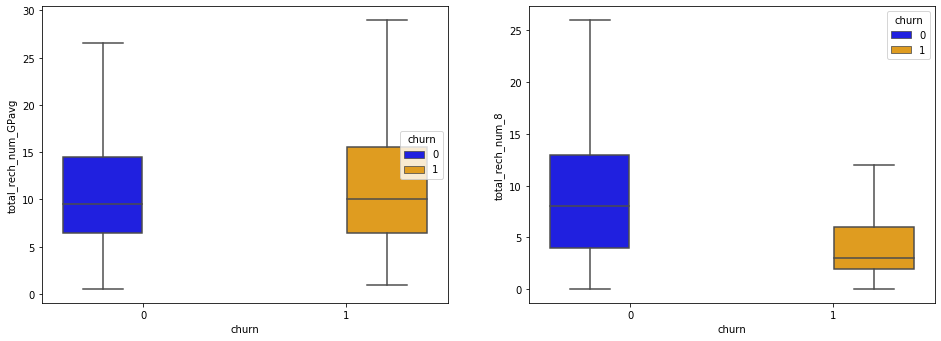

In [65]:
plot_box_plot('total_rech_num')

* Less total recharge number in August month, more likely to churn.

##### max_rech_data vs churn

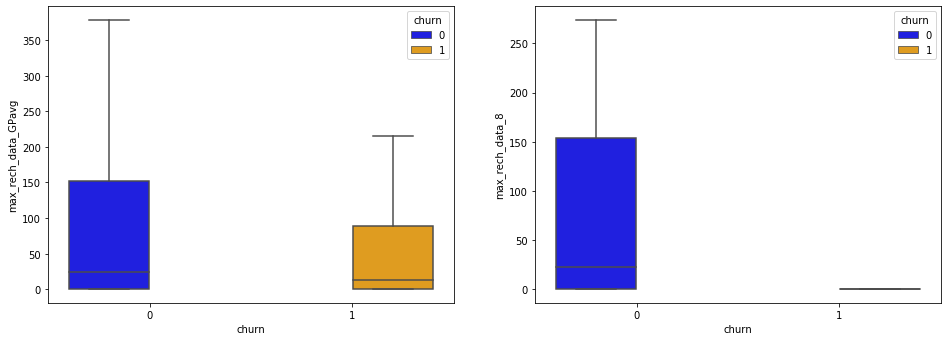

In [66]:
plot_box_plot('max_rech_data')

* Least max recharge data, more likely to churn.

##### arpu vs churn

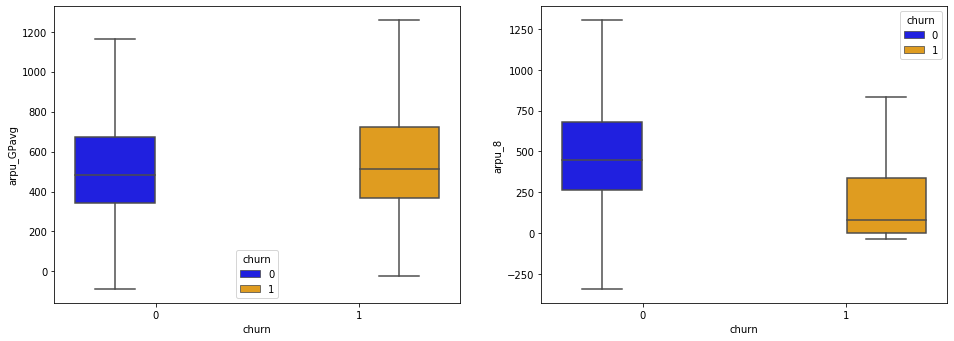

In [67]:
plot_box_plot('arpu')

* As the average revenue per user reduce in August, customers become more prone to churn.

##### onnet_mou vs churn

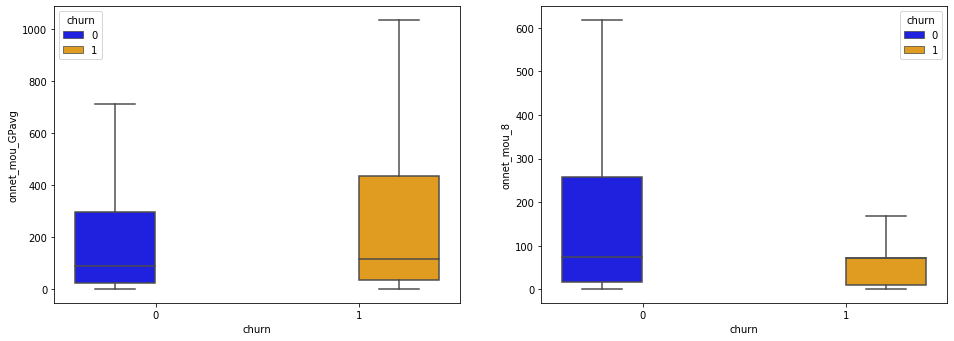

In [68]:
plot_box_plot('onnet_mou')

##### offnet_mou vs churn

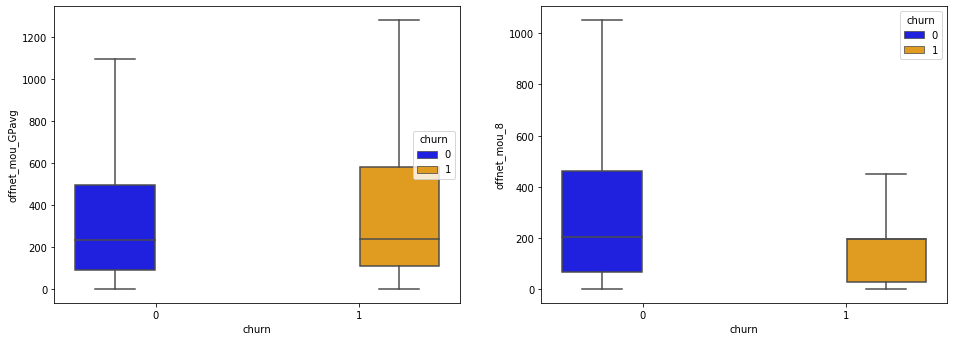

In [69]:
plot_box_plot('offnet_mou')

* Least onnet and offnet minutes of usage in August month, most likely to churn.

##### total_ic_mou vs churn

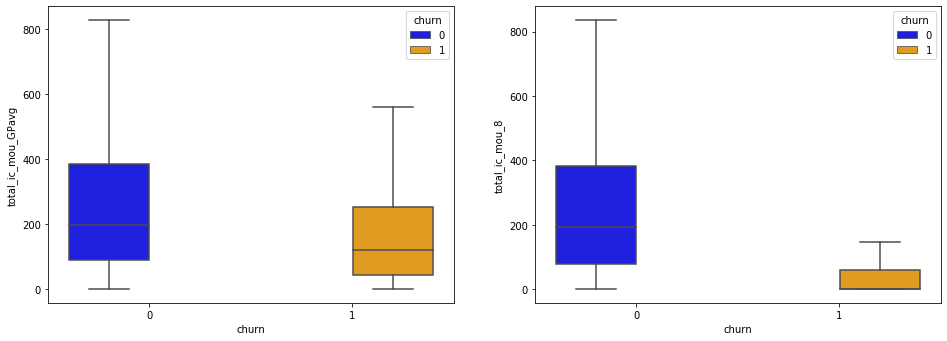

In [70]:
plot_box_plot('total_ic_mou')

##### total_og_mou vs churn

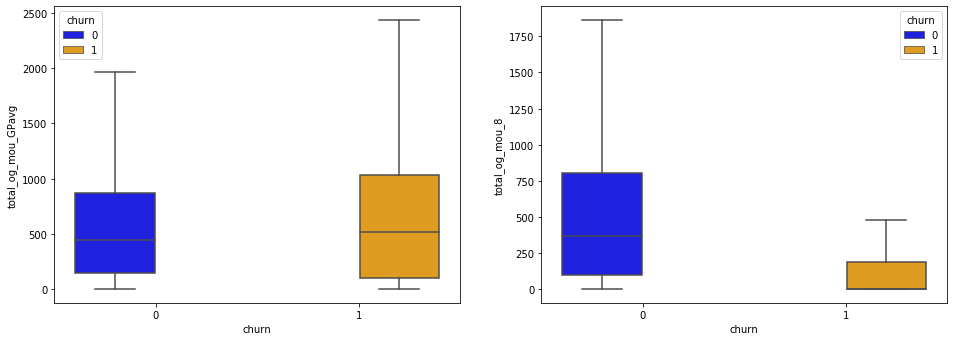

In [71]:
plot_box_plot('total_og_mou')

* Least total incoming and outgoing calls in August month, more likely to churn.

##### vol_2g_mb vs churn

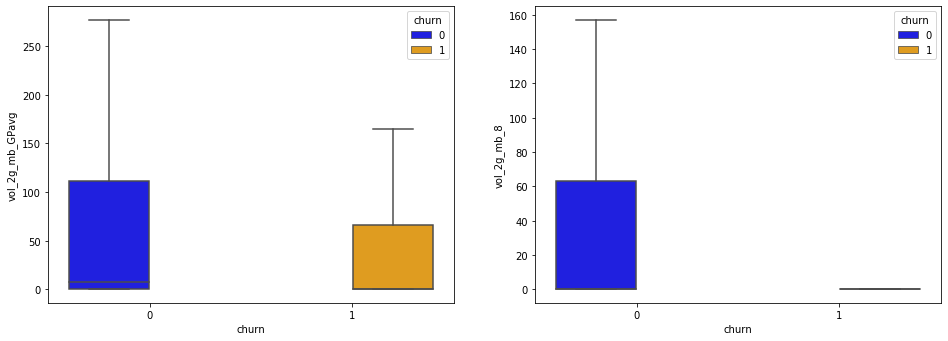

In [72]:
plot_box_plot('vol_2g_mb')

##### vol_3g_mb vs churn

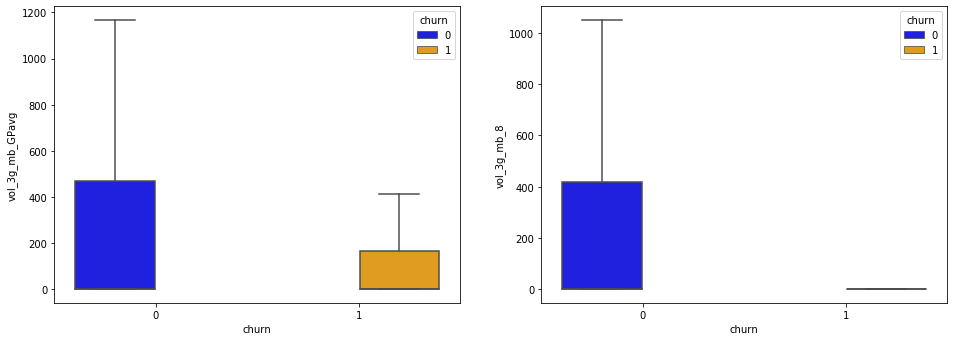

In [73]:
plot_box_plot('vol_3g_mb')

* Less volume of 2g and 3g usage, more likely to churn.

##### aon vs churn

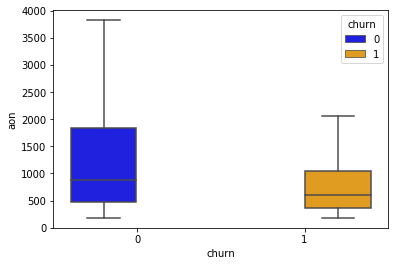

In [74]:
sns.boxplot(data=high_value_cust, y="aon",x="churn",hue="churn",
                showfliers=False,palette=["blue","orange"])

* Less age on network, more likely to churn.

##### roaming calls vs churn

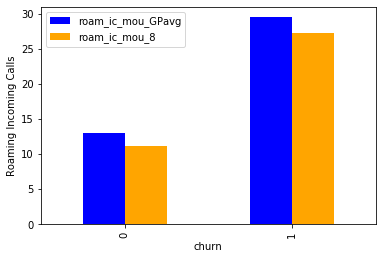

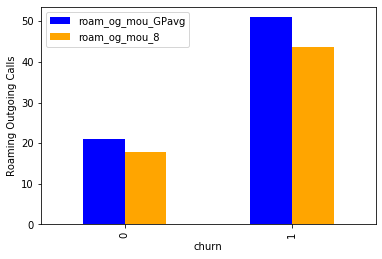

In [75]:
df1 = high_value_cust.groupby(['churn'])['roam_ic_mou_GPavg','roam_ic_mou_8'].mean()
df1.plot.bar(color=['blue','orange'])
plt.ylabel("Roaming Incoming Calls")
plt.show()

df1 = high_value_cust.groupby(['churn'])['roam_og_mou_GPavg','roam_og_mou_8'].mean()
df1.plot.bar(color=['blue','orange'])
plt.ylabel("Roaming Outgoing Calls")
plt.show()

* Least roaming calls, more likely to churn.

##### std calls vs churn

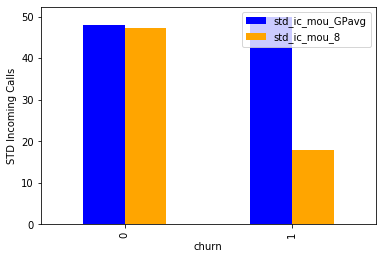

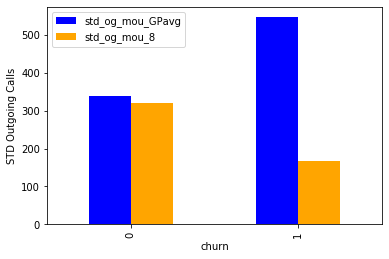

In [76]:
df1 = high_value_cust.groupby(['churn'])['std_ic_mou_GPavg','std_ic_mou_8'].mean()
df1.plot.bar(color=['blue','orange'])
plt.ylabel("STD Incoming Calls")
plt.show()

df1 = high_value_cust.groupby(['churn'])['std_og_mou_GPavg','std_og_mou_8'].mean()
df1.plot.bar(color=['blue','orange'])
plt.ylabel("STD Outgoing Calls")
plt.show()

* Least STD calls, more likely to churn.

##### isd calls vs churn

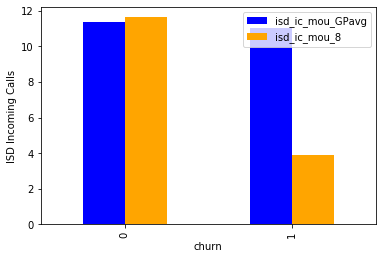

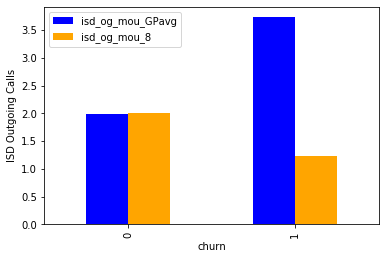

In [77]:
df1 = high_value_cust.groupby(['churn'])['isd_ic_mou_GPavg','isd_ic_mou_8'].mean()
df1.plot.bar(color=['blue','orange'])
plt.ylabel("ISD Incoming Calls")
plt.show()

df1 = high_value_cust.groupby(['churn'])['isd_og_mou_GPavg','isd_og_mou_8'].mean()
df1.plot.bar(color=['blue','orange'])
plt.ylabel("ISD Outgoing Calls")
plt.show()

* Least ISD calls, more likely to churn.

##### Correlation Matrikx

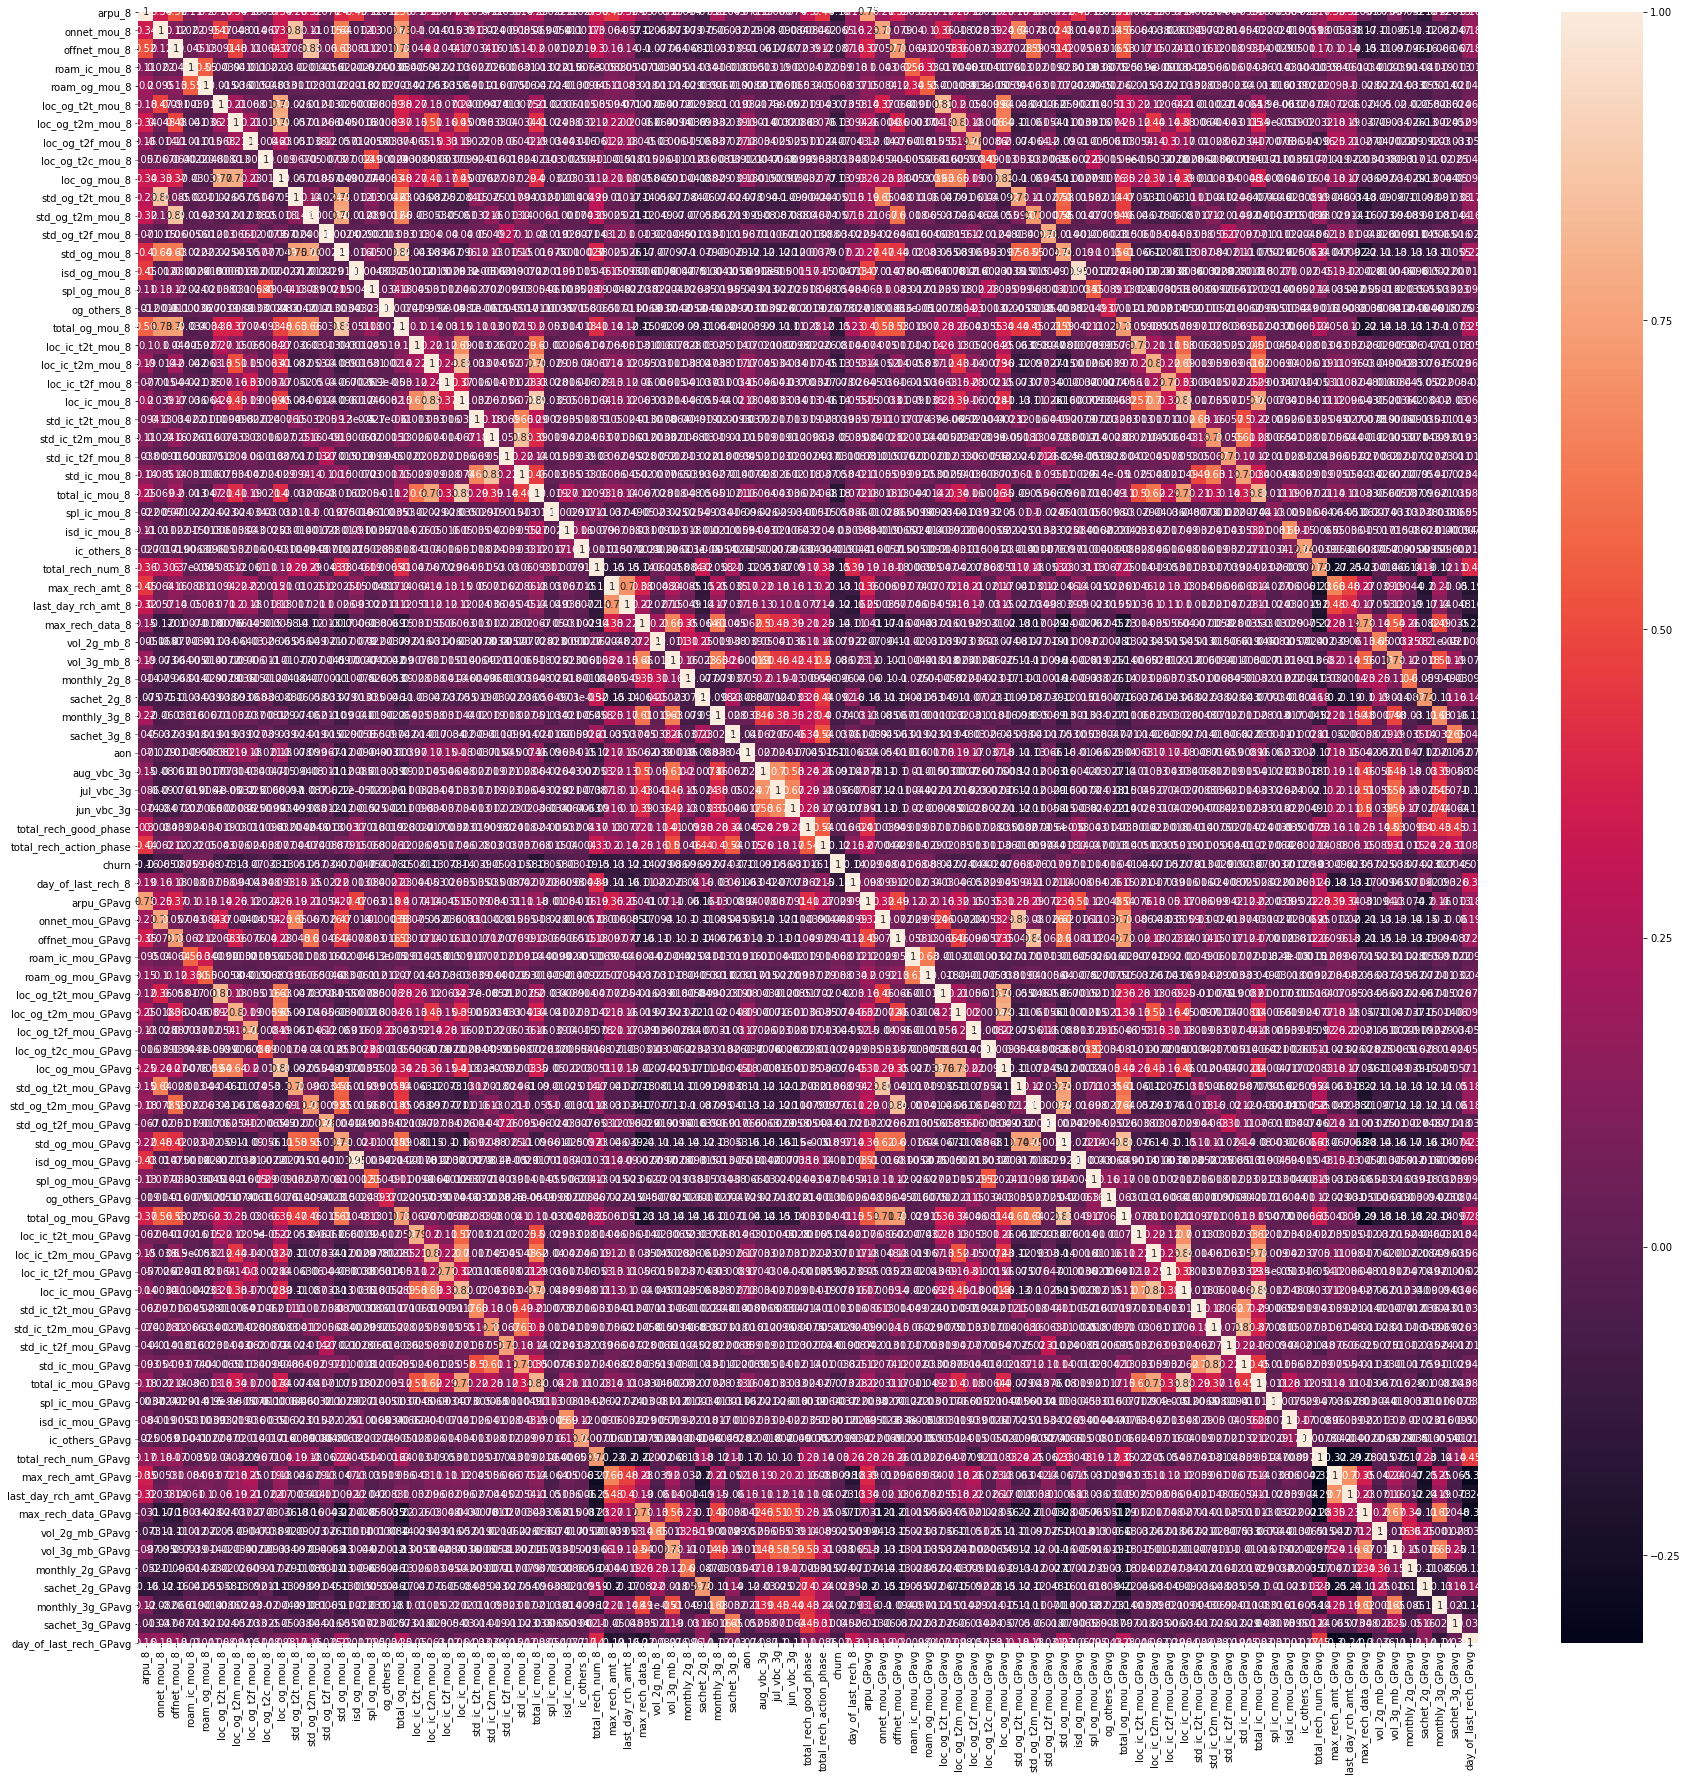

In [78]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(high_value_cust.corr(),annot = True)

### Modelling Interpretable Model

#### Logistic Regression

In [110]:
X = high_value_cust.drop(['churn'],axis=1)
y = high_value_cust['churn']

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7 ,test_size = 0.3, random_state=101)

In [111]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20911
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3420.4
Date:                Sun, 30 Aug 2020   Deviance:                       6840.8
Time:                        07:17:13   Pearson chi2:                 7.68e+04
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4348      0.346     -1.256      0.209      -1.113       0.244
arpu_8                     -8.3846      8.462     -0.991      0.322     -24.969       8.200
onnet_mou_8               -38.9645     53.840     -0.724      0.469    -144.489      66.560
offnet_mou_8              -67.1932     69.236     -0.970      0.332    -202.893      68.507
roam_ic_mou_8              -1.4965      1.998     -0.749      0.454      -5.413       2.420
roam_og_mou_8              25.6102     26.630      0.962      0.336     -26.584      77.805
loc_og_t2t_mou_8         2.128e+05   7.43e+04      2.865      0.004    6.72e+04    3.58e+05
loc_og_t2m_mou_8         9.821e+04   3.43e+04      2.865      0.004     3.1e+04    1.65e+05
loc_og_t2f_mou_8         1.839e+04   6415.020      2.866      0.004    5814.726     3.1e+04
loc_og_t2c_mou_8            3.8269      2.477      1.545      0.122      -1.028       8.682
loc_og_mou_8            -2.381e+05   8.57e+04     -2.777      0.005   -4.06e+05      -7e+04
std_og_t2t_mou_8         1.345e+05   7.06e+04      1.906      0.057   -3790.818    2.73e+05
std_og_t2m_mou_8         2.342e+05   1.23e+05      1.906      0.057   -6586.765    4.75e+05
std_og_t2f_mou_8         8669.5526   4552.336      1.904      0.057    -252.861    1.76e+04
std_og_mou_8            -2.594e+05    1.3e+05     -1.995      0.046   -5.14e+05   -4617.359
isd_og_mou_8            -1.007e+04   2.77e+04     -0.364      0.716   -6.43e+04    4.41e+04
spl_og_mou_8            -1695.7651   4646.306     -0.365      0.715   -1.08e+04    7410.828
og_others_8             -1001.0654   1950.266     -0.513      0.608   -4823.516    2821.385
total_og_mou_8           2.492e+04   6.84e+04      0.365      0.715   -1.09e+05    1.59e+05
loc_ic_t2t_mou_8         1.696e+05    2.6e+04      6.529      0.000    1.19e+05    2.21e+05
loc_ic_t2m_mou_8         1.967e+05   3.01e+04      6.529      0.000    1.38e+05    2.56e+05
loc_ic_t2f_mou_8         6.729e+04   1.03e+04      6.528      0.000    4.71e+04    8.75e+04
loc_ic_mou_8            -1.476e+05   3.95e+04     -3.741      0.000   -2.25e+05   -7.03e+04
std_ic_t2t_mou_8         7.784e+04   3.89e+04      1.998      0.046    1496.789    1.54e+05
std_ic_t2m_mou_8          1.02e+05    5.1e+04      1.999      0.046    1977.309    2.02e+05
std_ic_t2f_mou_8         2.519e+04   1.26e+04      1.998      0.046     481.531    4.99e+04
std_ic_mou_8            -1.839e+04   5.92e+04     -0.311      0.756   -1.34e+05    9.76e+04
total_ic_mou_8          -9.087e+04   3.07e+04     -2.963      0.003   -1.51e+05   -3.08e+04
spl_ic_mou_8               61.7740     32.431      1.905      0.057      -1.790     125.338
isd_ic_mou_8             5.142e+04   1.74e+04      2.963      0.003    1.74e+04    8.54e+04
ic_others_8              1.813e+04   6115.782  

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression     

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

rfe = RFE(logreg, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [113]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', False, 12),
 ('onnet_mou_8', False, 41),
 ('offnet_mou_8', False, 28),
 ('roam_ic_mou_8', False, 49),
 ('roam_og_mou_8', False, 25),
 ('loc_og_t2t_mou_8', False, 34),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 6),
 ('loc_og_t2c_mou_8', False, 58),
 ('loc_og_mou_8', False, 15),
 ('std_og_t2t_mou_8', False, 61),
 ('std_og_t2m_mou_8', False, 27),
 ('std_og_t2f_mou_8', False, 10),
 ('std_og_mou_8', False, 40),
 ('isd_og_mou_8', False, 54),
 ('spl_og_mou_8', False, 32),
 ('og_others_8', False, 69),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 9),
 ('loc_ic_t2m_mou_8', False, 35),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', False, 42),
 ('std_ic_t2t_mou_8', False, 44),
 ('std_ic_t2m_mou_8', False, 50),
 ('std_ic_t2f_mou_8', False, 52),
 ('std_ic_mou_8', False, 56),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 13),
 ('ic_others_8', False, 55),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 51),

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['loc_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aug_vbc_3g', 'roam_og_mou_GPavg', 'std_og_mou_GPavg',
       'std_ic_mou_GPavg', 'total_rech_num_GPavg'],
      dtype='object')

In [115]:
# build the model on the 15 important variables from RFE
X_train_sm = X_train[col]
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4010.9
Date:                Sun, 30 Aug 2020   Deviance:                       8021.8
Time:                        07:17:48   Pearson chi2:                 3.54e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
loc_og_t2m_mou_8         1.8921      1.594      1.187      0.235      -1.232       5.017
total_og_mou_8         -13.2921      1.526     -8.711      0.000     -16.283     -10.302
loc_ic_t2f_mou_8       -20.5699      5.995     -3.431      0.001     -32.320      -8.820
total_ic_mou_8         -37.4442      2.312    -16.195      0.000     -41.976     -32.913
spl_ic_mou_8           -42.7571      6.123     -6.983      0.000     -54.759     -30.755
total_rech_num_8       -16.5177      1.536    -10.753      0.000     -19.529     -13.507
last_day_rch_amt_8     -22.4928      2.042    -11.016      0.000     -26.495     -18.491
monthly_2g_8            -8.7971      0.839    -10.489      0.000     -10.441      -7.153
sachet_2g_8            -17.2172      1.482    -11.616      0.000     -20.122     -14.312
monthly_3g_8           -13.1634      1.714     -7.682      0.000     -16.522      -9.805
aug_vbc_3g             -13.1945      2.400     -5.498      0.000     -17.899      -8.491
roam_og_mou_GPavg        4.5764      0.553      8.276      0.000       3.493       5.660
std_og_mou_GPavg         3.2500      0.549      5.915      0.000       2.173       4.327
std_ic_mou_GPavg        11.4004      1.994      5.718      0.000       7.492      15.308
total_rech_num_GPavg     1.4467      0.651      2.222      0.026       0.171       2.723
========================================================================================
"""

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X_train_sm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [117]:
checkVIF(X_train_sm)

,Features,VIF
5,total_rech_num_8,6.38
14,total_rech_num_GPavg,5.63
1,total_og_mou_8,4.41
12,std_og_mou_GPavg,3.02
3,total_ic_mou_8,2.48
0,loc_og_t2m_mou_8,2.27
10,aug_vbc_3g,1.59
6,last_day_rch_amt_8,1.54
9,monthly_3g_8,1.51
8,sachet_2g_8,1.43


In [118]:
# Remove 'loc_og_t2m_mou_8' and build the model again
X_train_sm = X_train_sm.drop('loc_og_t2m_mou_8', axis=1)

In [119]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4011.6
Date:                Sun, 30 Aug 2020   Deviance:                       8023.2
Time:                        07:17:49   Pearson chi2:                 3.24e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
total_og_mou_8         -12.8087      1.461     -8.769      0.000     -15.672      -9.946
loc_ic_t2f_mou_8       -20.3122      5.953     -3.412      0.001     -31.979      -8.645
total_ic_mou_8         -36.5960      2.191    -16.705      0.000     -40.890     -32.302
spl_ic_mou_8           -42.8884      6.123     -7.004      0.000     -54.890     -30.887
total_rech_num_8       -16.6217      1.533    -10.842      0.000     -19.626     -13.617
last_day_rch_amt_8     -22.2908      2.034    -10.957      0.000     -26.278     -18.303
monthly_2g_8            -8.8030      0.839    -10.495      0.000     -10.447      -7.159
sachet_2g_8            -17.2409      1.482    -11.634      0.000     -20.145     -14.336
monthly_3g_8           -13.1178      1.713     -7.656      0.000     -16.476      -9.759
aug_vbc_3g             -13.2430      2.402     -5.514      0.000     -17.950      -8.536
roam_og_mou_GPavg        4.5542      0.552      8.248      0.000       3.472       5.636
std_og_mou_GPavg         3.1221      0.537      5.818      0.000       2.070       4.174
std_ic_mou_GPavg        11.2383      1.981      5.672      0.000       7.355      15.121
total_rech_num_GPavg     1.5715      0.641      2.453      0.014       0.316       2.827
========================================================================================
"""

In [120]:
checkVIF(X_train_sm)

,Features,VIF
4,total_rech_num_8,6.34
13,total_rech_num_GPavg,5.45
0,total_og_mou_8,3.57
11,std_og_mou_GPavg,2.66
2,total_ic_mou_8,2.26
9,aug_vbc_3g,1.59
8,monthly_3g_8,1.51
5,last_day_rch_amt_8,1.50
7,sachet_2g_8,1.43
12,std_ic_mou_GPavg,1.37


In [121]:
# Remove 'total_rech_num_8' and build the model again
X_train_sm = X_train_sm.drop('total_rech_num_8', axis=1)

In [122]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4079.2
Date:                Sun, 30 Aug 2020   Deviance:                       8158.3
Time:                        07:17:50   Pearson chi2:                 3.40e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
total_og_mou_8         -21.6860      1.356    -15.993      0.000     -24.344     -19.028
loc_ic_t2f_mou_8       -16.7992      5.789     -2.902      0.004     -28.146      -5.453
total_ic_mou_8         -39.3530      2.234    -17.619      0.000     -43.731     -34.975
spl_ic_mou_8           -44.7382      6.199     -7.216      0.000     -56.889     -32.588
last_day_rch_amt_8     -21.9571      2.065    -10.633      0.000     -26.004     -17.910
monthly_2g_8            -9.3369      0.838    -11.136      0.000     -10.980      -7.694
sachet_2g_8            -21.3890      1.439    -14.860      0.000     -24.210     -18.568
monthly_3g_8           -14.8525      1.708     -8.695      0.000     -18.200     -11.505
aug_vbc_3g             -13.6784      2.398     -5.704      0.000     -18.379      -8.978
roam_og_mou_GPavg        3.6945      0.557      6.639      0.000       2.604       4.785
std_og_mou_GPavg         4.2976      0.530      8.109      0.000       3.259       5.336
std_ic_mou_GPavg        11.8819      2.026      5.865      0.000       7.911      15.853
total_rech_num_GPavg    -3.1552      0.502     -6.288      0.000      -4.139      -2.172
========================================================================================
"""

In [123]:
checkVIF(X_train_sm)

,Features,VIF
0,total_og_mou_8,2.84
10,std_og_mou_GPavg,2.54
12,total_rech_num_GPavg,2.41
2,total_ic_mou_8,2.26
8,aug_vbc_3g,1.59
7,monthly_3g_8,1.50
4,last_day_rch_amt_8,1.48
11,std_ic_mou_GPavg,1.37
1,loc_ic_t2f_mou_8,1.27
6,sachet_2g_8,1.26


In [124]:
coeff = res.params

In [125]:
X_train_sm.columns

Index(['total_og_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aug_vbc_3g', 'roam_og_mou_GPavg', 'std_og_mou_GPavg',
       'std_ic_mou_GPavg', 'total_rech_num_GPavg'],
      dtype='object')

In [126]:
col = ['total_og_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aug_vbc_3g', 'roam_og_mou_GPavg', 'std_og_mou_GPavg',
       'std_ic_mou_GPavg', 'total_rech_num_GPavg']

In [127]:
# Predicting on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [128]:
y_train_pred[:10]

array([1.30721899e-05, 4.47612750e-03, 1.94818935e-01, 8.43552588e-04,
       5.83243470e-02, 6.59048348e-02, 5.18029835e-03, 2.32655208e-01,
       1.11053504e-03, 9.93126009e-02])

In [129]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.000013
1,0,0.004476
2,0,0.194819
3,0,0.000844
4,0,0.058324


In [130]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final['Churn_Prob'] = y_train_pred

In [131]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18195  1094]
 [  583  1128]]


In [132]:
# Accuracy score on train data
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9201428571428572


In [133]:
# ROC AUC score on train data
print('Accuracy: %.2f' % metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Accuracy: 0.80


In [134]:
X_test = X_test[col]
X_test.head()

,total_og_mou_8,loc_ic_t2f_mou_8,total_ic_mou_8,spl_ic_mou_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,roam_og_mou_GPavg,std_og_mou_GPavg,std_ic_mou_GPavg,total_rech_num_GPavg
6015,0.000000,0.002008,0.009430,0.0,0.003821,0.0,0.159091,0.0000,0.000000,0.000000,0.000000,0.000033,0.067742
28661,0.050985,0.000252,0.219402,0.0,0.056642,0.2,0.000000,0.0625,0.033701,0.000000,0.004121,0.040489,0.087097
12498,0.000000,0.000000,0.000000,0.0,0.056192,0.0,0.000000,0.0000,0.000000,0.575012,0.000000,0.000000,0.083871
22957,0.087394,0.007479,0.011527,0.0,0.009440,0.0,0.000000,0.0000,0.000000,0.000000,0.146849,0.001456,0.158065
14848,0.073285,0.149220,0.066574,0.0,0.029220,0.0,0.000000,0.0000,0.000000,0.000000,0.007620,0.012052,0.048387


In [135]:
# Predicting on test data
y_test_pred = res.predict(X_test).values.reshape(-1)
y_test_pred[:10]

array([1.62244075e-02, 8.14776980e-07, 6.51565924e-01, 7.36386772e-02,
       6.52389545e-04, 4.99502366e-04, 1.00874159e-05, 4.29452260e-02,
       1.16019396e-03, 1.28669260e-01])

In [136]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()

,Churn,Churn_Prob
0,0,1.622441e-02
1,0,8.147770e-07
2,1,6.515659e-01
3,0,7.363868e-02
4,0,6.523895e-04


In [137]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_test_pred_final['Churn_Prob'] = y_test_pred

In [138]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

[[7743  528]
 [ 284  446]]


In [139]:
# Accuracy Score on test data
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

0.9097878013554049


In [140]:
# ROC AUC score on test data
print('Accuracy: %.2f' % metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

Accuracy: 0.77


### Modelling with PCA

#### Train-Test Split

In [141]:
X = high_value_cust.drop(['churn'],axis=1)
y = high_value_cust['churn']

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

from sklearn.model_selection import train_test_split
x_tr, X_test, y_tr, y_test = train_test_split(X_norm, y, train_size=0.7 ,test_size = 0.3, random_state=100)

#### Handling Imbalance

In [142]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_sample(x_tr,y_tr)

In [143]:
X_train.shape

(38618, 88)

In [144]:
X_test.shape

(9001, 88)

In [145]:
print("Churn to Unchurn ratio in y-train:",sum(y_train==1)/sum(y_train==0))

Churn to Unchurn ratio in y-train: 1.0


In [146]:
print("Churn to Unchurn ratio in y-test:",sum(y_test==1)/sum(y_test==0))

Churn to Unchurn ratio in y-test: 0.09089807296085323


In [147]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,max_rech_amt_GPavg,last_day_rch_amt_GPavg,max_rech_data_GPavg,vol_2g_mb_GPavg,vol_3g_mb_GPavg,monthly_2g_GPavg,sachet_2g_GPavg,monthly_3g_GPavg,sachet_3g_GPavg,day_of_last_rech_GPavg
0,0.044606,0.000450,0.007001,0.007461,0.001847,0.000450,0.003993,0.000000,0.003127,0.002234,...,0.129888,0.069839,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.719298
1,0.037981,0.003786,0.018948,0.000000,0.000000,0.003786,0.042642,0.037200,0.000000,0.025981,...,0.034859,0.033548,0.063023,0.009657,0.006671,0.000000,0.065789,0.0,0.0,0.842105
2,0.036510,0.007745,0.015231,0.016406,0.014369,0.002468,0.025664,0.000000,0.000000,0.013939,...,0.037587,0.009677,0.014791,0.000014,0.000000,0.000000,0.065789,0.0,0.0,0.964912
3,0.047877,0.064863,0.039625,0.005470,0.004414,0.058952,0.072196,0.020420,0.006765,0.091582,...,0.036375,0.017742,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.964912
4,0.035084,0.002222,0.005830,0.000000,0.000000,0.001117,0.015738,0.003856,0.000000,0.008486,...,0.046681,0.004839,0.099035,0.004592,0.011594,0.222222,0.000000,0.0,0.0,0.929825


#### PCA

In [148]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

pca.fit(X_train)

PCA(random_state=42)

In [149]:
pca.components_

array([[ 6.96242445e-03, -1.09151911e-02,  4.38222398e-04, ...,
         1.69423828e-02, -7.19048554e-03, -8.26073719e-02],
       [-1.80206252e-02, -4.16474040e-02, -3.63341619e-02, ...,
         1.86395661e-02, -1.04446033e-03, -2.02069099e-01],
       [ 1.84410795e-02,  9.04647152e-02,  5.65983458e-02, ...,
        -7.72394924e-02, -1.16405956e-02,  5.94982985e-01],
       ...,
       [ 3.08433592e-06,  4.10501217e-06,  5.54899186e-06, ...,
         4.15330231e-07,  4.98258450e-07, -1.38922358e-07],
       [ 8.20045596e-07,  2.05113007e-06,  2.60915237e-06, ...,
         1.63138155e-07,  7.82459474e-08, -4.10199094e-08],
       [-7.16075078e-07, -1.98476615e-06, -3.18368350e-06, ...,
        -2.67079759e-08, -9.00382548e-08, -1.21034805e-08]])

In [150]:
pca.explained_variance_ratio_

array([2.21257364e-01, 2.01946740e-01, 1.21685475e-01, 6.70109006e-02,
       6.09053687e-02, 4.30522367e-02, 3.40378423e-02, 3.02737260e-02,
       2.30089435e-02, 1.82581886e-02, 1.81209486e-02, 1.39937140e-02,
       1.17353863e-02, 1.09932337e-02, 9.29174499e-03, 8.02007420e-03,
       7.60277345e-03, 7.29435290e-03, 6.69850240e-03, 5.99668729e-03,
       5.88608268e-03, 4.93210736e-03, 4.59109023e-03, 4.27424667e-03,
       4.18607190e-03, 3.99832880e-03, 3.78520378e-03, 3.66694620e-03,
       3.54201813e-03, 2.55992921e-03, 2.51801585e-03, 2.31983989e-03,
       2.01077626e-03, 1.94110808e-03, 1.85632720e-03, 1.79686367e-03,
       1.76498074e-03, 1.72319853e-03, 1.58009212e-03, 1.37929624e-03,
       1.26640527e-03, 1.17517692e-03, 1.12820992e-03, 1.09802639e-03,
       1.01914845e-03, 9.99198554e-04, 9.70559127e-04, 9.67839733e-04,
       9.54939442e-04, 9.28234144e-04, 8.85297770e-04, 7.46313565e-04,
       7.07436092e-04, 6.61594275e-04, 6.05620113e-04, 5.60016507e-04,
      

In [151]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

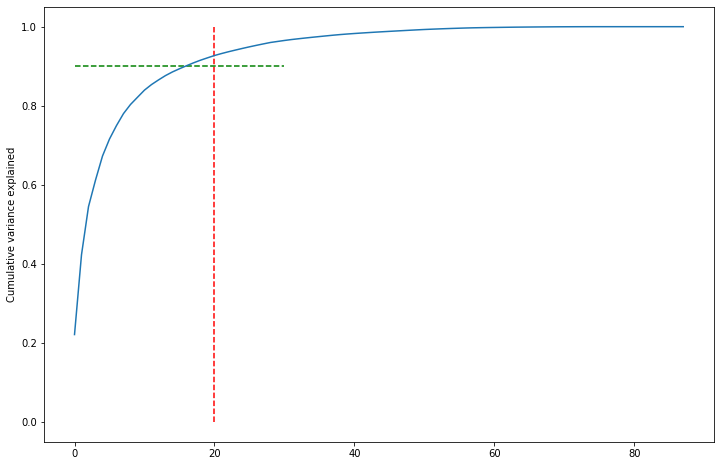

In [152]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [153]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=20)

df_train_pca = pca_final.fit_transform(X_train)

df_train_pca.shape

(38618, 20)

In [154]:
corrmat = np.corrcoef(df_train_pca.transpose())

corrmat.shape

(20, 20)

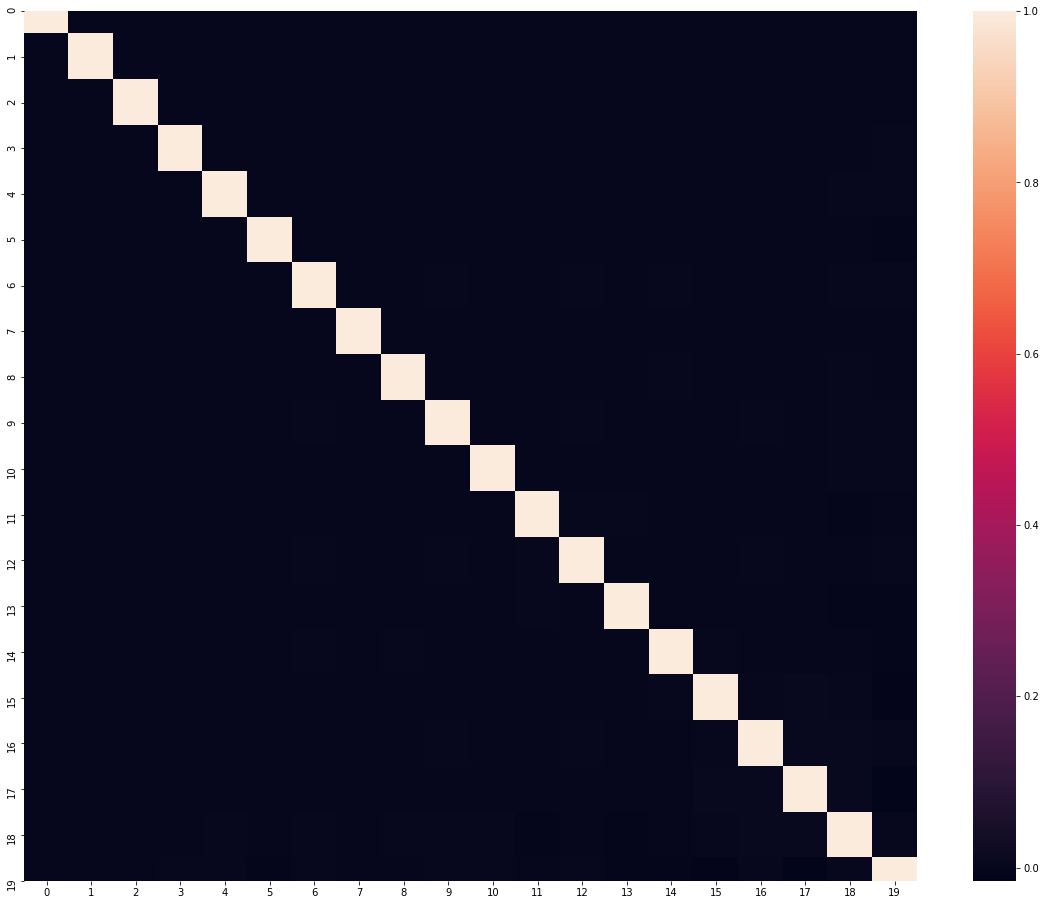

In [156]:
plt.figure(figsize=[20,16])
sns.heatmap(corrmat, annot=False)

In [157]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 20)

In [158]:
# Function for metrics calculation

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
def metrics_cal(y_test,y_pred):
    print("\033[1mConfusion Matrix:\n")
    print(confusion_matrix(y_test,y_pred))
    accuracy = round(accuracy_score(y_test,y_pred),3)
    precision = round(precision_score(y_test,y_pred),3)
    recall = round(recall_score(y_test,y_pred),3)
    roc_auc = round(roc_auc_score(y_test,y_pred),3)
    f1 = round(f1_score(y_test,y_pred),3)

    metric = [[accuracy,precision,recall,roc_auc,f1]] 
    df = pd.DataFrame(metric, columns = ['Accuracy','Precision','Recall','AUC','F1'])
    return df.style.hide_index()

### Model #1 : Logistic Regression 

In [159]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_LR = learner_pca.fit(df_train_pca, y_train)

In [160]:
y_pred_LR = model_LR.predict(df_test_pca)

In [161]:
print("\033[1m'Logistic Regression with PCA'\n")
metrics_cal(y_test,y_pred_LR)

'Logistic Regression with PCA'

Confusion Matrix:

[[6718 1533]
 [ 134  616]]


Accuracy,Precision,Recall,AUC,F1
0.815,0.287,0.821,0.818,0.425


Logisctic Regression model has a good recall (predicts churn customers right 82.1% times) and accuracy score (classifies customers accurately 81.5% times)

### Model #2 : SVM linear

In [162]:
X = high_value_cust.drop(['churn'],axis=1)
y = high_value_cust['churn']

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

from sklearn.model_selection import train_test_split
x_tr, X_test, y_tr, y_test = train_test_split(X_norm, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [163]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_sample(x_tr,y_tr)

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(X_test)

In [164]:
df_test_pca.shape

(9001, 20)

In [165]:
# Building SVM model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [166]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(kernel="linear", class_weight='balanced')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)  

In [167]:
model_cv.fit(df_train_pca, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 50.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(class_weight='balanced', kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [168]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,44.611804,1.404971,3.821998,0.103734,0.1,{'C': 0.1},0.826903,0.828975,0.819135,0.831931,...,0.826480,0.004269,5,0.826892,0.825759,0.828996,0.824858,0.826121,0.826525,0.001398
1,41.519628,4.035908,3.245543,0.246779,1,{'C': 1},0.832211,0.834801,0.825479,0.838664,...,0.832617,0.004311,4,0.833236,0.832395,0.834369,0.831526,0.831656,0.832636,0.001060
2,41.392899,0.988771,3.014074,0.104650,10,{'C': 10},0.832341,0.835966,0.826774,0.838405,...,0.833420,0.003917,3,0.834272,0.832815,0.835534,0.832530,0.833112,0.833653,0.001112
3,71.169053,1.651176,2.971902,0.090308,100,{'C': 100},0.832988,0.836095,0.826774,0.838275,...,0.833653,0.003881,1,0.834272,0.832815,0.835599,0.832562,0.833145,0.833679,0.001124
4,320.078425,1.274651,2.926337,0.042982,1000,{'C': 1000},0.832988,0.835966,0.826774,0.838275,...,0.833601,0.003862,2,0.834272,0.832848,0.835470,0.832627,0.833047,0.833653,0.001073


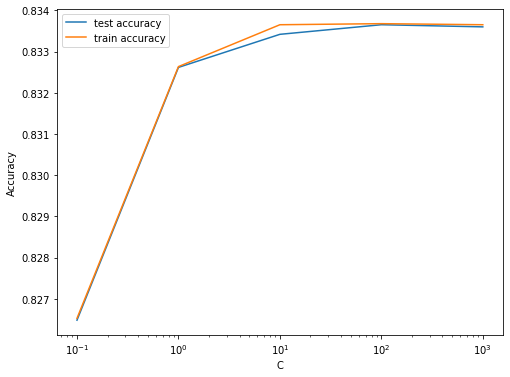

In [169]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [170]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.8336528329128867 at C = 100


In [171]:
# model with the best value of C
model_SVM_linear = SVC(C=100, kernel="linear", class_weight='balanced')

# fit
model_SVM_linear.fit(df_train_pca, y_train)

# predict
y_pred_SVM_linear = model_SVM_linear.predict(df_test_pca)

In [172]:
print("\033[1m'SVM linear with PCA'\n")
metrics_cal(y_test,y_pred_SVM_linear)

'SVM linear with PCA'

Confusion Matrix:

[[6815 1436]
 [ 140  610]]


Accuracy,Precision,Recall,AUC,F1
0.825,0.298,0.813,0.82,0.436


SVM linear model has a better accuracy (82.5%) and almost same recall (81.3%) compared to Logsitic Regression.

Thus, SVM linear model is better than Logisctic Regression.

### Model #3 : SVM rbf 

In [173]:
X = high_value_cust.drop(['churn'],axis=1)
y = high_value_cust['churn']

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [174]:
pca_final = IncrementalPCA(n_components=20)

df_train_pca = pca_final.fit_transform(X_train)

df_test_pca = pca_final.transform(X_test)

In [175]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf", class_weight='balanced')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train)   

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 46.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(class_weight='balanced'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [176]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,34.369552,0.941241,4.420374,0.521976,1,0.01,"{'C': 1, 'gamma': 0.01}",0.723571,0.713571,0.718571,...,0.717667,0.003536,7,0.713155,0.717619,0.713869,0.720952,0.722560,0.717631,0.003729
1,44.452874,2.210064,5.242357,0.073521,1,0.001,"{'C': 1, 'gamma': 0.001}",0.647143,0.681190,0.649762,...,0.659381,0.014439,11,0.638274,0.681667,0.651548,0.674464,0.647619,0.658714,0.016536
2,38.228113,2.766477,4.488023,0.085104,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.917381,0.077857,0.076667,...,0.581286,0.411543,12,0.920000,0.081190,0.081488,0.918929,0.921131,0.584548,0.410868
3,22.736680,0.575361,2.763216,0.137401,10,0.01,"{'C': 10, 'gamma': 0.01}",0.798810,0.790000,0.804762,...,0.796190,0.006141,4,0.792143,0.794643,0.798571,0.796131,0.798214,0.795940,0.002376
4,30.420595,0.390823,3.704199,0.168701,10,0.001,"{'C': 10, 'gamma': 0.001}",0.722857,0.713333,0.718095,...,0.717429,0.003345,8,0.712976,0.717321,0.713571,0.721548,0.722202,0.717524,0.003858
5,40.152612,0.403948,4.706472,0.042908,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.647381,0.681190,0.650238,...,0.659571,0.014294,10,0.638333,0.681786,0.652202,0.674524,0.647976,0.658964,0.016462
6,20.112757,0.236598,2.544257,0.443627,100,0.01,"{'C': 100, 'gamma': 0.01}",0.816190,0.803571,0.820952,...,0.813667,0.005808,2,0.812143,0.813095,0.816488,0.812500,0.816429,0.814131,0.001925
7,22.869855,0.479736,2.756119,0.082613,100,0.001,"{'C': 100, 'gamma': 0.001}",0.799524,0.789524,0.804048,...,0.795524,0.006011,5,0.792083,0.793869,0.798393,0.794405,0.797560,0.795262,0.002361
8,30.859573,0.522250,3.740121,0.158363,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.722619,0.713333,0.718095,...,0.717286,0.003246,9,0.712619,0.717321,0.713631,0.721488,0.722202,0.717452,0.003920
9,21.789994,0.450424,2.558969,0.552116,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.819286,0.815952,0.824762,...,0.818524,0.003365,1,0.817560,0.818750,0.821964,0.818036,0.822619,0.819786,0.002091


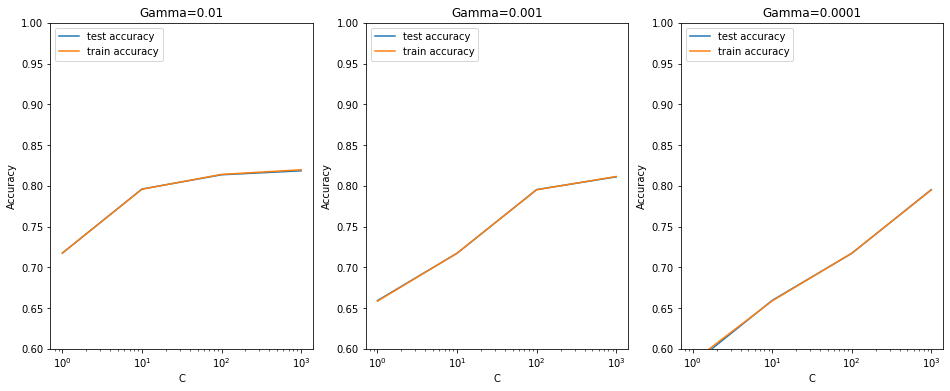

In [177]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [178]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8185238095238094 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [179]:
# model
model_SVM_rbf = SVC(C= 1000, gamma=0.01, kernel="rbf", class_weight='balanced')

model_SVM_rbf.fit(df_train_pca, y_train)

y_pred_SVM_rbf = model_SVM_rbf.predict(df_test_pca)

In [180]:
print("\033[1m'SVM rbf with PCA'\n")
metrics_cal(y_test,y_pred_SVM_rbf)

'SVM rbf with PCA'

Confusion Matrix:

[[6779 1472]
 [ 126  624]]


Accuracy,Precision,Recall,AUC,F1
0.822,0.298,0.832,0.827,0.439


SVM rbf model has almost same accuracy (82.2%) and better recall (83.2%) compared to SVM linear.

Thus, SVM rbf model is better than SVM linear and Logisctic Regression models.

### Model #4 : AdaBoost

In [181]:
X = high_value_cust.drop(['churn'],axis=1)
y = high_value_cust['churn']

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

from sklearn.model_selection import train_test_split
x_tr, X_test, y_tr, y_test = train_test_split(X_norm, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [182]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_sample(x_tr,y_tr)

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(X_test)

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [184]:
# Adaboost - Hyperparameter Tuning

In [185]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [186]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [187]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [188]:
# fit 
grid_search_ABC.fit(df_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 64.9min finished


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [189]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,58.989893,0.643468,0.462485,0.004989,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.903275,0.912091,0.906824,0.907397,0.003622,6,0.915392,0.913167,0.915561,0.914707,0.001091
1,117.199568,1.548473,1.031259,0.094706,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.908065,0.914993,0.911453,0.911504,0.002828,5,0.920974,0.917002,0.920961,0.919645,0.001869
2,174.934403,0.643676,1.505784,0.083558,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.910527,0.918038,0.915108,0.914558,0.003091,4,0.924059,0.920685,0.925308,0.923351,0.001953
3,160.413652,2.988154,0.574577,0.022835,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.935360,0.947114,0.942337,0.941604,0.004826,3,0.962207,0.960783,0.963821,0.962270,0.001241
4,307.948358,15.851655,1.186645,0.199961,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.948810,0.958529,0.953858,0.953732,0.003969,2,0.979191,0.978973,0.980606,0.979590,0.000724
5,459.694139,24.618221,1.479874,0.064463,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.952641,0.963618,0.956305,0.957521,0.004563,1,0.985361,0.987000,0.984201,0.985521,0.001148


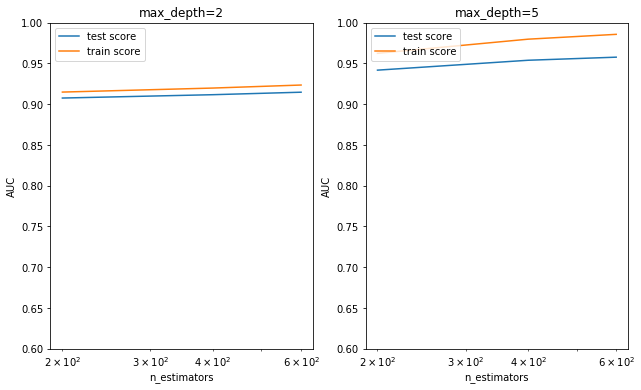

In [190]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [191]:
best_score = grid_search_ABC.best_score_
best_hyperparams = grid_search_ABC.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9575212382302385 corresponding to hyperparameters {'base_estimator__max_depth': 5, 'n_estimators': 600}


###### Chosen hyperparameters : max_depth=5, n_estimator=600

In [192]:
# base estimator
tree = DecisionTreeClassifier(max_depth=5)

# adaboost with the tree as base estimator
model_ABC_1 = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=600,
    algorithm="SAMME")

model_ABC_1.fit(df_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.6, n_estimators=600)

In [193]:
# predict on test data
y_pred_ABC_1 = model_ABC_1.predict(df_test_pca)

print("\033[1m'AdaBoost with PCA'\n")
metrics_cal(y_test,y_pred_ABC_1)

'AdaBoost with PCA'

Confusion Matrix:

[[7299  952]
 [ 209  541]]


Accuracy,Precision,Recall,AUC,F1
0.871,0.362,0.721,0.803,0.482


Great Accuracy but very bad recall score. So let's choose max_depth=2 and build the model again.

###### Chosen hyperparameters : max_depth=2, n_estimator=600

In [194]:
# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
model_ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=600,
    algorithm="SAMME")

model_ABC.fit(df_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.6, n_estimators=600)

In [195]:
# predict on test data
y_pred_ABC = model_ABC.predict(df_test_pca)

In [196]:
print("\033[1m'AdaBoost with PCA'\n")
metrics_cal(y_test,y_pred_ABC)

'AdaBoost with PCA'

Confusion Matrix:

[[6914 1337]
 [ 159  591]]


Accuracy,Precision,Recall,AUC,F1
0.834,0.307,0.788,0.813,0.441


This has better metrics than the previous Adabooost model.

Better accuracy (83.4%) but the recall score (78.8%) is less than SVM rbf.

### Model #5 : XGBoost

In [197]:
import xgboost as xgb
from xgboost import XGBClassifier

# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [198]:
y_pred = model.predict_proba(df_test_pca)
y_pred[:10]

array([[0.7213634 , 0.27863657],
       [0.521473  , 0.478527  ],
       [0.96167463, 0.03832535],
       [0.9985008 , 0.00149919],
       [0.84154403, 0.15845598],
       [0.99799377, 0.00200622],
       [0.9425025 , 0.05749752],
       [0.991764  , 0.00823597],
       [0.99173117, 0.00826882],
       [0.9293891 , 0.07061091]], dtype=float32)

In [199]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=600)

# set up GridSearchCV()
model_cv_1 = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [200]:
# fit the model
model_cv_1.fit(df_train_pca, y_train)      

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  7.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=600, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [201]:
# cv results
cv_results = pd.DataFrame(model_cv_1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,12.274256,0.164970,0.152647,0.013083,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.938174,0.947477,0.941304,0.942318,0.003865,5,0.962673,0.958005,0.960267,0.960315,0.001906
1,19.655965,2.037639,0.155274,0.019922,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.939546,0.949084,0.943053,0.943894,0.003939,3,0.963561,0.960446,0.962043,0.962017,0.001272
2,28.804995,1.961481,0.251190,0.105247,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.940270,0.947795,0.943398,0.943821,0.003087,4,0.962920,0.959177,0.962100,0.961399,0.001607
3,16.268837,0.324998,0.185915,0.003889,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.934424,0.945626,0.938978,0.939676,0.004600,6,0.974027,0.972581,0.972840,0.973149,0.000629
4,28.372139,6.920414,0.227174,0.038379,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.945504,0.952971,0.946936,0.948471,0.003236,2,0.982144,0.980780,0.982651,0.981858,0.000790
5,47.140064,6.999270,0.281345,0.048417,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.947687,0.953867,0.949623,0.950393,0.002581,1,0.985226,0.982431,0.983888,0.983848,0.001141


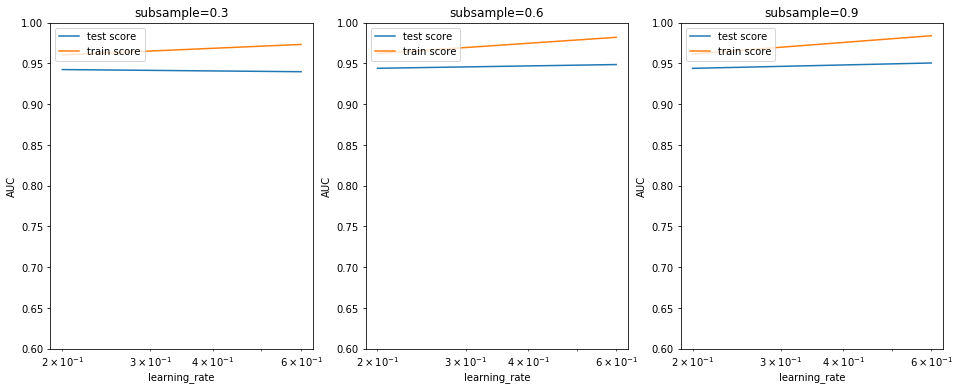

In [202]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [203]:
best_score = model_cv_1.best_score_
best_hyperparams = model_cv_1.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9503925601738348 corresponding to hyperparameters {'learning_rate': 0.6, 'subsample': 0.9}


###### Chosen hyperparameters : learning_rate=0.6, subsample=0.9

In [204]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':600,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model_XGB = XGBClassifier(params = params)
model_XGB.fit(df_train_pca, y_train)

[11:35:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 600,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [205]:
# predict
y_pred_XGB = model_XGB.predict(df_test_pca)

In [206]:
print("\033[1m'XGBoost with PCA'\n")
metrics_cal(y_test,y_pred_XGB)

'XGBoost with PCA'

Confusion Matrix:

[[7471  780]
 [ 265  485]]


Accuracy,Precision,Recall,AUC,F1
0.884,0.383,0.647,0.776,0.481


Best accuracy (88.4%) among all the models but the recall score (64.7%) is the least. Even though it is classifying most accurately compared to all the other models, we are more interested in the churn customers and XGBoost is not predicting them well.

 ### Evaluation Metrics


##### Accuracy Score
Log Reg : 0.815, SVM_lin : 0.825, SVM_rbf : 0.822, AdaBoost: 0.834, XGBoost : 0.884

##### Precision Score
Log Reg : 0.287, SVM_lin : 0.298, SVM_rbf : 0.298, AdaBoost: 0.307, XGBoost : 0.383

##### Recall Score

Log Reg : 0.821, SVM_lin : 0.813, SVM_rbf : 0.832, AdaBoost: 0.788, XGBoost : 0.647

##### ROC AUC Score

Log Reg : 0.818, SVM_lin : 0.820, SVM_rbf : 0.827, AdaBoost: 0.813, XGBoost : 0.776

##### F1 Score

Log Reg : 0.425, SVM_lin : 0.436, SVM_rbf : 0.439, AdaBoost: 0.441, XGBoost : 0.481

### Model Selection

Retaining high profitable customers is the number one business goal. So the right metrics to consider while selecting a model are:

##### Recall
Probability that an actual churn is predicted correctly.

Logistic Regression model has 82.1% and SVM rbf has 83.2% churn customers classified correcly respectively.

##### Accuracy 
Fraction of predictions that our model got right.

All the models have over 81% accuracy. But SVM rbf have both good accuracy and recall scores compared to all the other models.


#### So we are selecting 'SVM rbf' model for churn predictions.

### Business Insights

##### Important Variables from Action Phase

total_og_mou_8 - Total Outgoing mou

loc_ic_t2f_mou_8 - Local Incoming T2F(Operator T to fixed lines of T) mou

total_ic_mou_8 - Total Incoming mou

spl_ic_mou_8 - Special calls incoming mou

last_day_rch_amt_8 - Last Day Recharge Amount 

monthly_2g_8 -  Monthly validity 2g service schemes 

sachet_2g_8 - Smaller than a month validity 2g service schemes 

monthly_3g_8 - Monthly validity 2g service schemes 

aug_vbc_3g - Volume based cost 3g

##### Important Variables from Good Phase

roam_og_mou_GPavg - Roaming outgoing mou

std_og_mou_GPavg - STD ougoing mou

std_ic_mou_GPavg - STD incoming mou

total_rech_num_GPavg - Total no of recharges done

In [207]:
a = pd.DataFrame(coeff, columns={"coeff"})
a

,coeff
total_og_mou_8,-21.685990
loc_ic_t2f_mou_8,-16.799199
total_ic_mou_8,-39.353048
spl_ic_mou_8,-44.738237
last_day_rch_amt_8,-21.957070
monthly_2g_8,-9.336887
sachet_2g_8,-21.388951
monthly_3g_8,-14.852464
aug_vbc_3g,-13.678414
roam_og_mou_GPavg,3.694492


##### Plotting the important variables

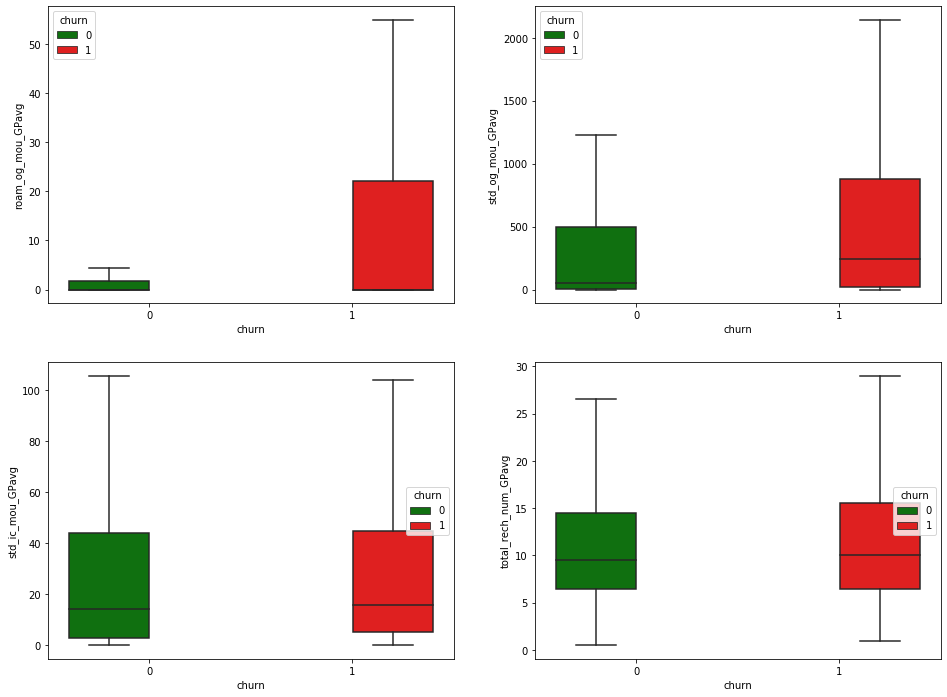

In [208]:
plt.figure(figsize=(16,12))
df = high_value_cust
plt.subplot(2,2,1)
sns.boxplot(data=df, y="roam_og_mou_GPavg",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.subplot(2,2,2)
sns.boxplot(data=df, y="std_og_mou_GPavg",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.subplot(2,2,3)
sns.boxplot(data=df, y="std_ic_mou_GPavg",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.subplot(2,2,4)
sns.boxplot(data=df, y="total_rech_num_GPavg",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.show()

* Customers with highest outgoing roaming minutes for Months 6 and 7 are likely to churn.
* Customers with highest std outgoing minutes for Months 6 and 7 are likely to churn.

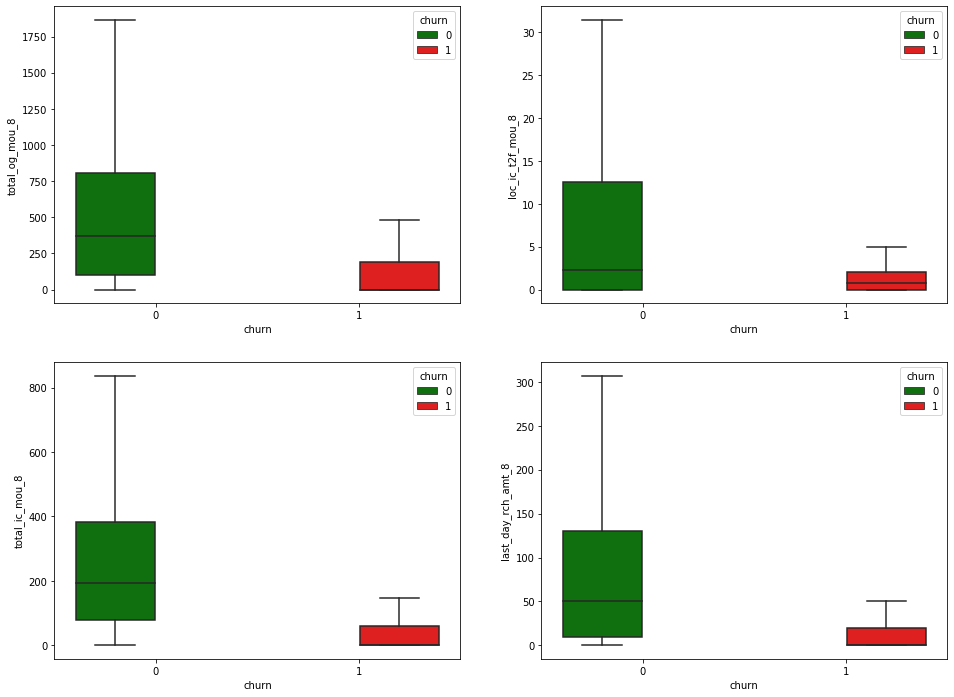

In [209]:
plt.figure(figsize=(16,12))
df = high_value_cust
plt.subplot(2,2,1)
sns.boxplot(data=df, y="total_og_mou_8",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.subplot(2,2,2)
sns.boxplot(data=df, y="loc_ic_t2f_mou_8",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.subplot(2,2,3)
sns.boxplot(data=df, y="total_ic_mou_8",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.subplot(2,2,4)
sns.boxplot(data=df, y="last_day_rch_amt_8",x="churn",hue="churn",
                showfliers=False,palette=["g","r"])
plt.show()

* Customers with least total incoming minutes and total outgoing minutes in month 8 are likely to churn.
* Customers with least local incoming minutes from operator T to fixed lines of T in month 8 are likely to churn.
* Customers with least last day recharge amount in month 8 are likely to churn.

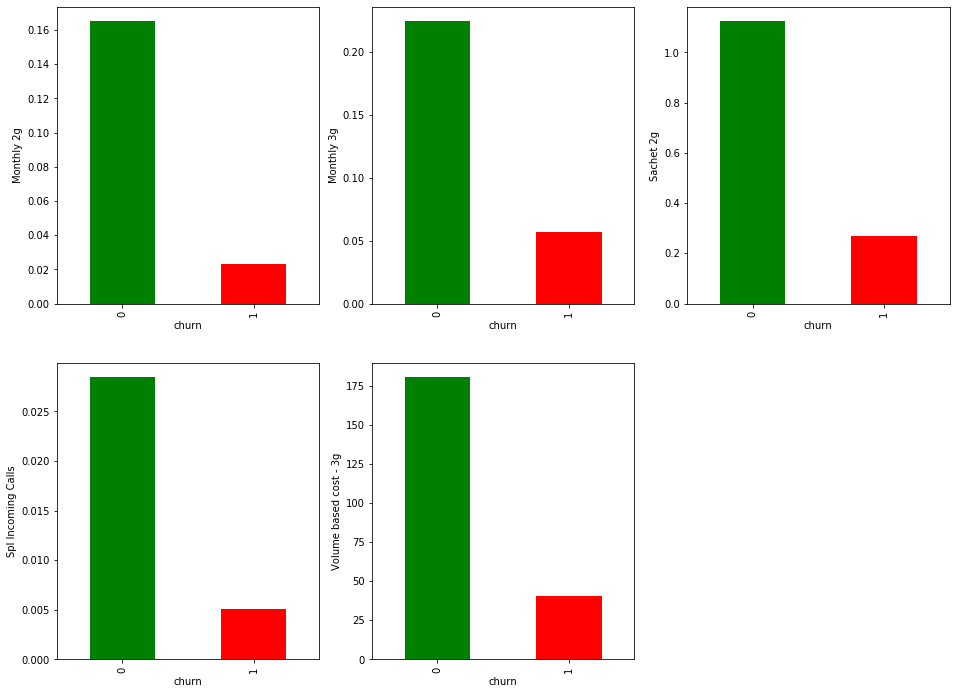

In [210]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
df1 = high_value_cust.groupby(['churn'])['monthly_2g_8'].mean()
df1.plot.bar(color=['green','red'])
plt.ylabel("Monthly 2g")

plt.subplot(2,3,2)
df1 = high_value_cust.groupby(['churn'])['monthly_3g_8'].mean()
df1.plot.bar(color=['green','red'])
plt.ylabel("Monthly 3g")

plt.subplot(2,3,3)
df1 = high_value_cust.groupby(['churn'])['sachet_2g_8'].mean()
df1.plot.bar(color=['green','red'])
plt.ylabel("Sachet 2g")

plt.subplot(2,3,4)
df1 = high_value_cust.groupby(['churn'])['spl_ic_mou_8'].mean()
df1.plot.bar(color=['green','red'])
plt.ylabel("Spl Incoming Calls")

plt.subplot(2,3,5)
df1 = high_value_cust.groupby(['churn'])['aug_vbc_3g'].mean()
df1.plot.bar(color=['green','red'])
plt.ylabel("Volume based cost - 3g")

plt.show()

* Customer with least monthly 2g & 3g schemes, sachet 2g scheme, volume based cost of 3g and special incoming calls minutes are likely to churn.

### Business Recommendations

* Provide roaming and STD packages to retain the customers, with highest roaming and STD calls in the months of June and July.
* Provide offers to customers whose total incoming and outgoing minutes are very less in the month of August.
* If the last day recharge amount in the month of August is less, then they are likely to churn.
* Customers who have not opted for monthly or sachet internet packages in the month of August are likly churners. It might be helpful to provide them with some internet offers.
* Reduce the cost of special incoming calls to the customers who are using them less.
* When customers are not purchasing any specific scheme and are paying per usage, better to offer them some interesting 3g monthly scheme offers inorder to retain them.